In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

# https://github.com/COVID19Tracking/associated-data
f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [4]:
df_us = pd.read_json(api_us)
df_states = pd.read_json(api_states)
df_pop = pd.read_csv(f_pop)

In [5]:
df_us.shape

(47, 24)

In [6]:
df_states.shape

(2228, 25)

In [7]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [8]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df_us.sort_values(by=['date']).tail()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
4,2020-04-10,56,493252,2036030.0,17435.0,48468.0,56342.0,12698.0,1185.0,5937.0,...,18488,56342.0,2546717,2529282,2529282,2064.0,4291.0,119310.0,34617.0,153927.0
3,2020-04-11,56,522843,2142823.0,16593.0,51409.0,58549.0,13563.0,1228.0,5978.0,...,20355,58549.0,2682259,2665666,2665666,1867.0,2207.0,106793.0,29591.0,136384.0
2,2020-04-12,56,551826,2254066.0,16419.0,51413.0,61201.0,13917.0,1455.0,5986.0,...,21919,61201.0,2822311,2805892,2805892,1564.0,2652.0,111243.0,28983.0,140226.0
1,2020-04-13,56,576774,2358232.0,17159.0,50968.0,62673.0,13632.0,1628.0,6168.0,...,23369,62673.0,2952165,2935006,2935006,1450.0,1472.0,104166.0,24948.0,129114.0
0,2020-04-14,56,602473,2479147.0,16615.0,54215.0,67547.0,14039.0,1715.0,5975.0,...,25668,67547.0,3098235,3081620,3081620,2299.0,4874.0,120915.0,25699.0,146614.0


In [10]:
df_states.sort_values(by=['date']).tail()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
32,2020-04-14,NE,871.0,10486.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11357.0,11357.0,11357.0,31,1.0,0.0,328.0,57.0,385.0
31,2020-04-14,ND,341.0,10575.0,NaN,13.0,42.0,NaN,NaN,NaN,...,42.0,10916.0,10916.0,10916.0,38,1.0,2.0,125.0,10.0,135.0
30,2020-04-14,NC,5024.0,60015.0,NaN,418.0,NaN,NaN,NaN,NaN,...,NaN,65039.0,65039.0,65039.0,37,22.0,0.0,1443.0,208.0,1651.0
28,2020-04-14,MS,3087.0,34791.0,NaN,NaN,596.0,154.0,NaN,99.0,...,596.0,37878.0,37878.0,37878.0,28,13.0,47.0,6749.0,145.0,6894.0
0,2020-04-14,AK,285.0,8063.0,NaN,NaN,32.0,NaN,NaN,NaN,...,32.0,8348.0,8348.0,8348.0,2,1.0,0.0,510.0,8.0,518.0


In [11]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive per 100,000
df_states['pos_rate'] = df_states['positive'] / (df_states['population'] / 1e5)

# Calculate hospitalized per 100,000
df_states['hosp_rate'] = df_states['hospitalized'] / (df_states['population'] / 1e5)

# Calculate deaths per 100,000
df_states['death_rate'] = df_states['death'] / (df_states['population'] / 1e5)

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate tests per 100,000 people
df_states['test_rate'] = df_states['total'] / (df_states['population'] / 1e5)

# Calculate 7-day average deaths
df_states['death_7dma'] = df_states['death'].rolling(window=7).mean()

In [12]:
df_states.tail()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,state_name,geo_id,population,pop_density,pos_rate,hosp_rate,death_rate,positive_rate,test_rate,death_7dma
2103,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN,NaN
2104,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,0.0,NaN
2105,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN,NaN
2106,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN,NaN
2107,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN,NaN


In [13]:
df_states.describe()

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,...,totalTestResultsIncrease,geo_id,population,pop_density,pos_rate,hosp_rate,death_rate,positive_rate,test_rate,death_7dma
count,2108.000000,1993.000000,485.000000,403.000000,651.000000,171.000000,104.000000,153.000000,32.000000,369.000000,...,2056.000000,2108.000000,2.108000e+03,2078.000000,2108.000000,651.000000,1436.000000,1988.000000,1993.000000,1130.000000
mean,3273.254744,14950.236327,1757.540206,1520.267990,1186.250384,849.906433,139.634615,343.620915,60.843750,872.560976,...,1497.632296,29.686907,6.476874e+06,428.354182,39.009728,10.404489,1.684296,0.132401,315.042356,133.100253
std,13549.591447,29107.928783,8630.586195,3392.322876,5025.719753,1258.480341,150.942480,456.213953,40.560675,3246.057150,...,3381.202507,16.395205,7.304532e+06,1591.737288,91.876899,25.603342,4.362270,0.144972,402.283591,565.945443
min,0.000000,0.000000,0.000000,10.000000,0.000000,9.000000,6.000000,4.000000,2.000000,2.000000,...,-638.000000,1.000000,5.777370e+05,1.291523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.750000,268.000000,6.000000,72.500000,42.000000,65.000000,24.000000,26.000000,39.000000,38.000000,...,32.000000,17.000000,1.805832e+06,54.955978,0.626236,2.288094,0.089415,0.051114,8.555753,5.428571
50%,277.000000,4180.000000,32.000000,197.000000,151.000000,191.000000,102.500000,52.000000,39.000000,135.000000,...,384.500000,30.000000,4.468402e+06,109.860468,9.425391,4.740244,0.470592,0.091470,141.583871,18.785714
75%,1551.000000,16986.000000,184.000000,1420.500000,487.500000,1166.000000,191.250000,507.000000,108.000000,340.000000,...,1535.250000,42.500000,7.535591e+06,229.511156,38.377409,8.953200,1.426018,0.156058,496.080562,71.214286
max,202208.000000,296935.000000,64400.000000,18825.000000,46201.000000,5225.000000,654.000000,1663.000000,132.000000,23887.000000,...,78400.000000,72.000000,3.955704e+07,11490.119540,1034.724375,236.416467,55.438973,0.924528,2554.179008,8583.000000


## California

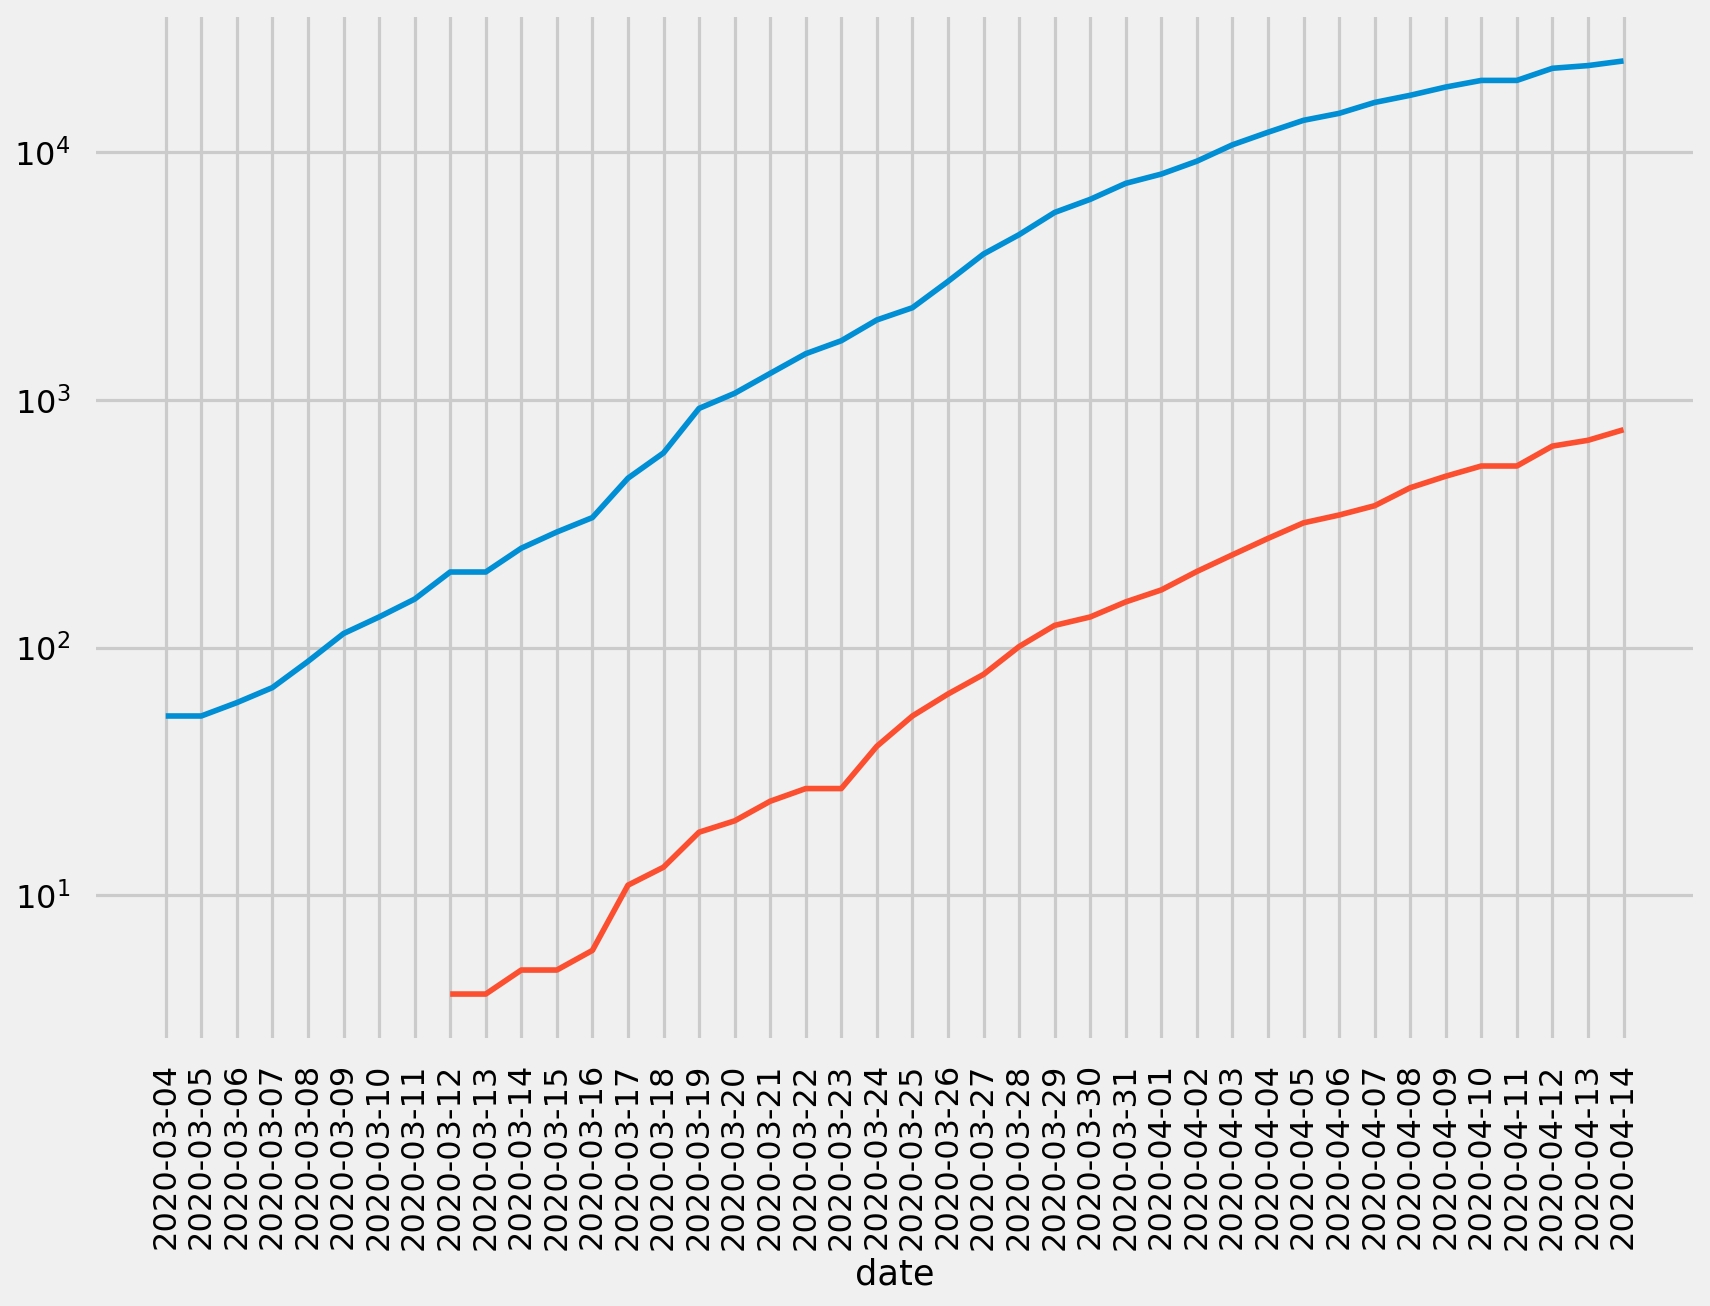

In [14]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="death", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_ylabel('')
ax.set_yscale('log')
plt.show()

## New York

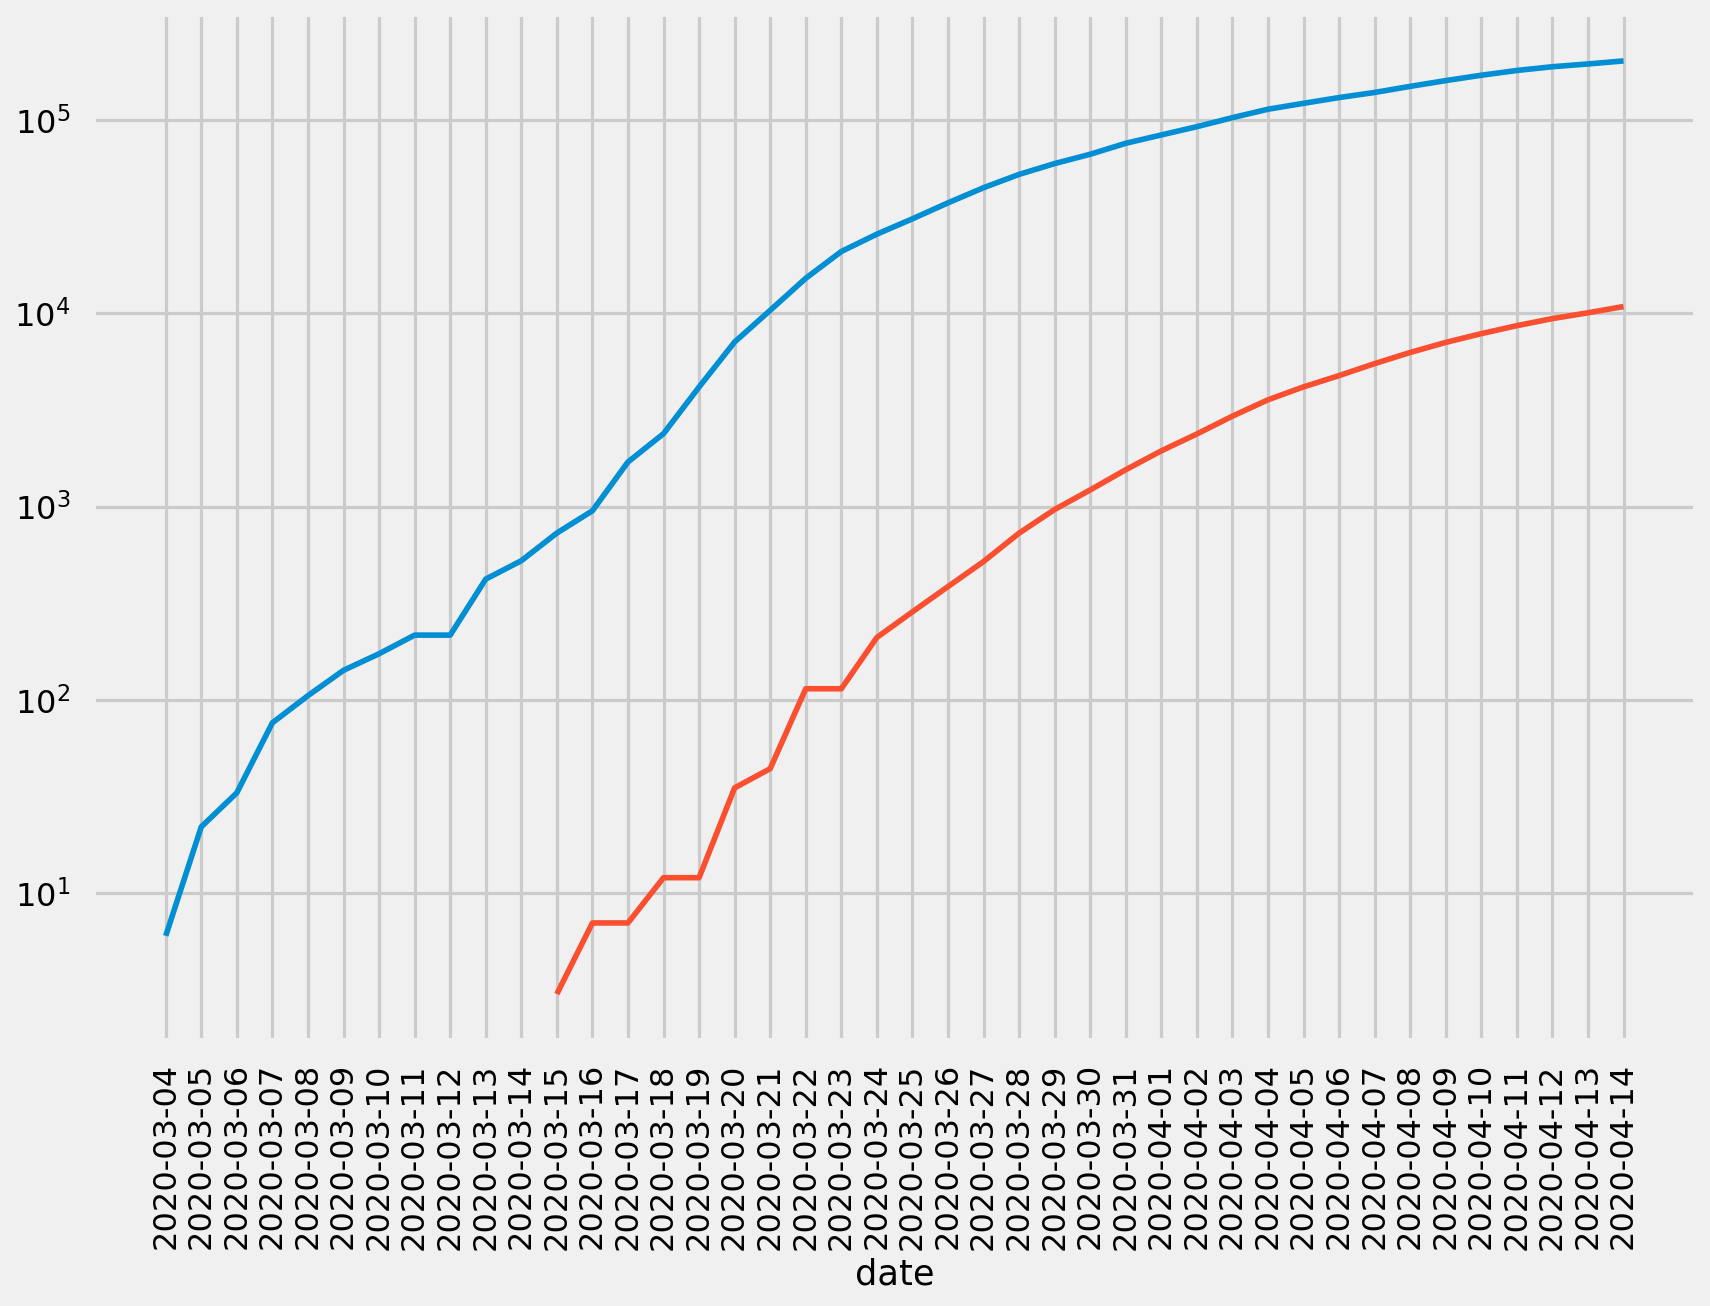

In [15]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="death", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
ax.set_ylabel('')
ax.set_yscale('log')
plt.show()

# Top 10 States by Deaths

In [16]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='death', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'NJ', 'MI', 'LA', 'MA', 'IL', 'CA', 'CT', 'PA', 'FL']

In [17]:
df_states.query('date == @latest_date').sort_values(by='death', 
                                                    ascending=False)[['state', 'death']]

,state,death
1377,NY,10834.0
1255,NJ,2805.0
889,MI,1768.0
728,LA,1013.0
767,MA,957.0
566,IL,868.0
161,CA,758.0
244,CT,671.0
1541,PA,584.0
364,FL,537.0


In [18]:
# Deaths per 100,000 people
df_states.query('date == @latest_date').sort_values(by='death_rate', 
                                                    ascending=False)[['state', 'death_rate']]

,state,death_rate
1377,NY,55.438973
1255,NJ,31.486712
728,LA,21.738300
244,CT,18.781498
889,MI,17.687225
767,MA,13.865247
283,DC,9.537978
1611,RI,7.566335
1940,WA,6.847505
566,IL,6.812609


# Deaths

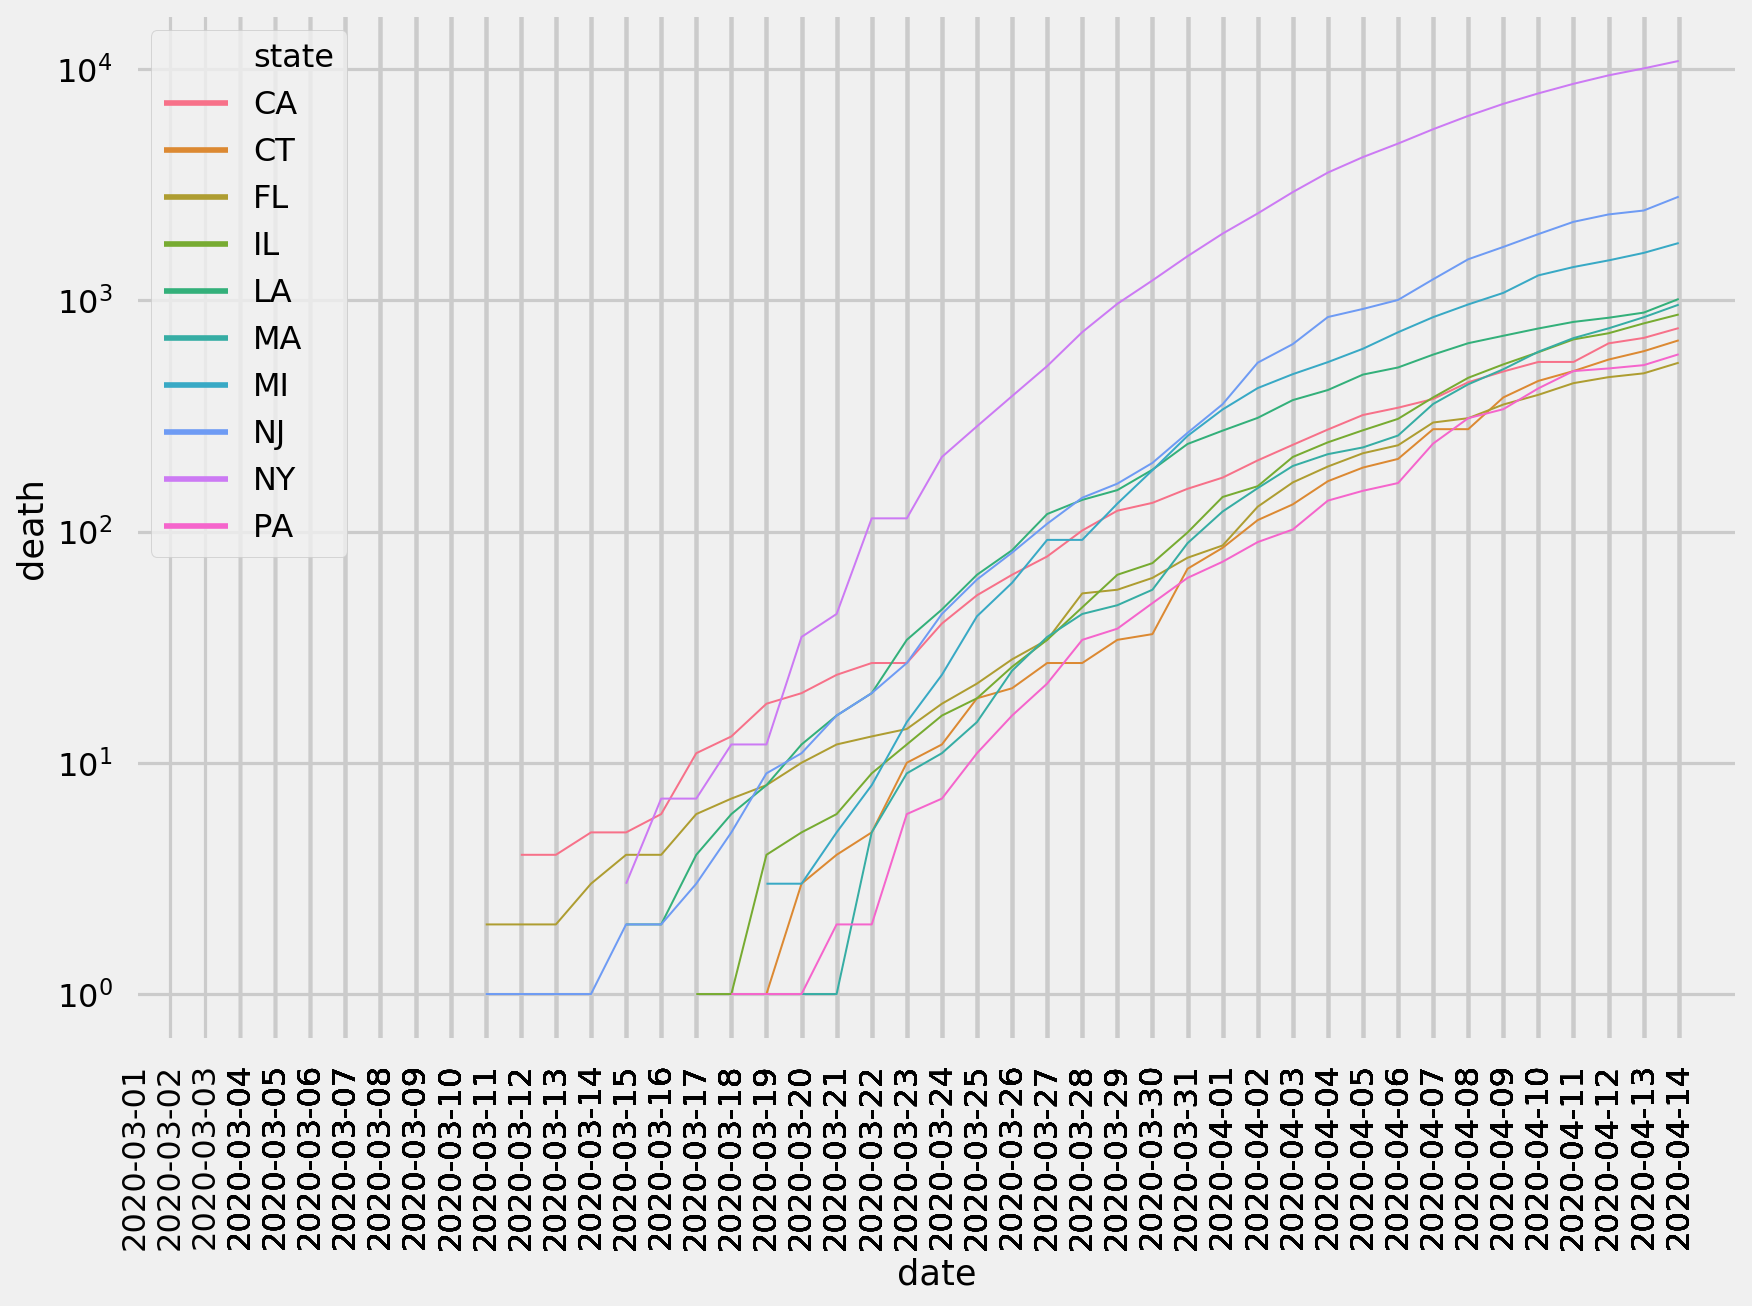

In [19]:
ax = sns.lineplot(x="date", 
                  y="death", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Deaths (7-day Moving Average)

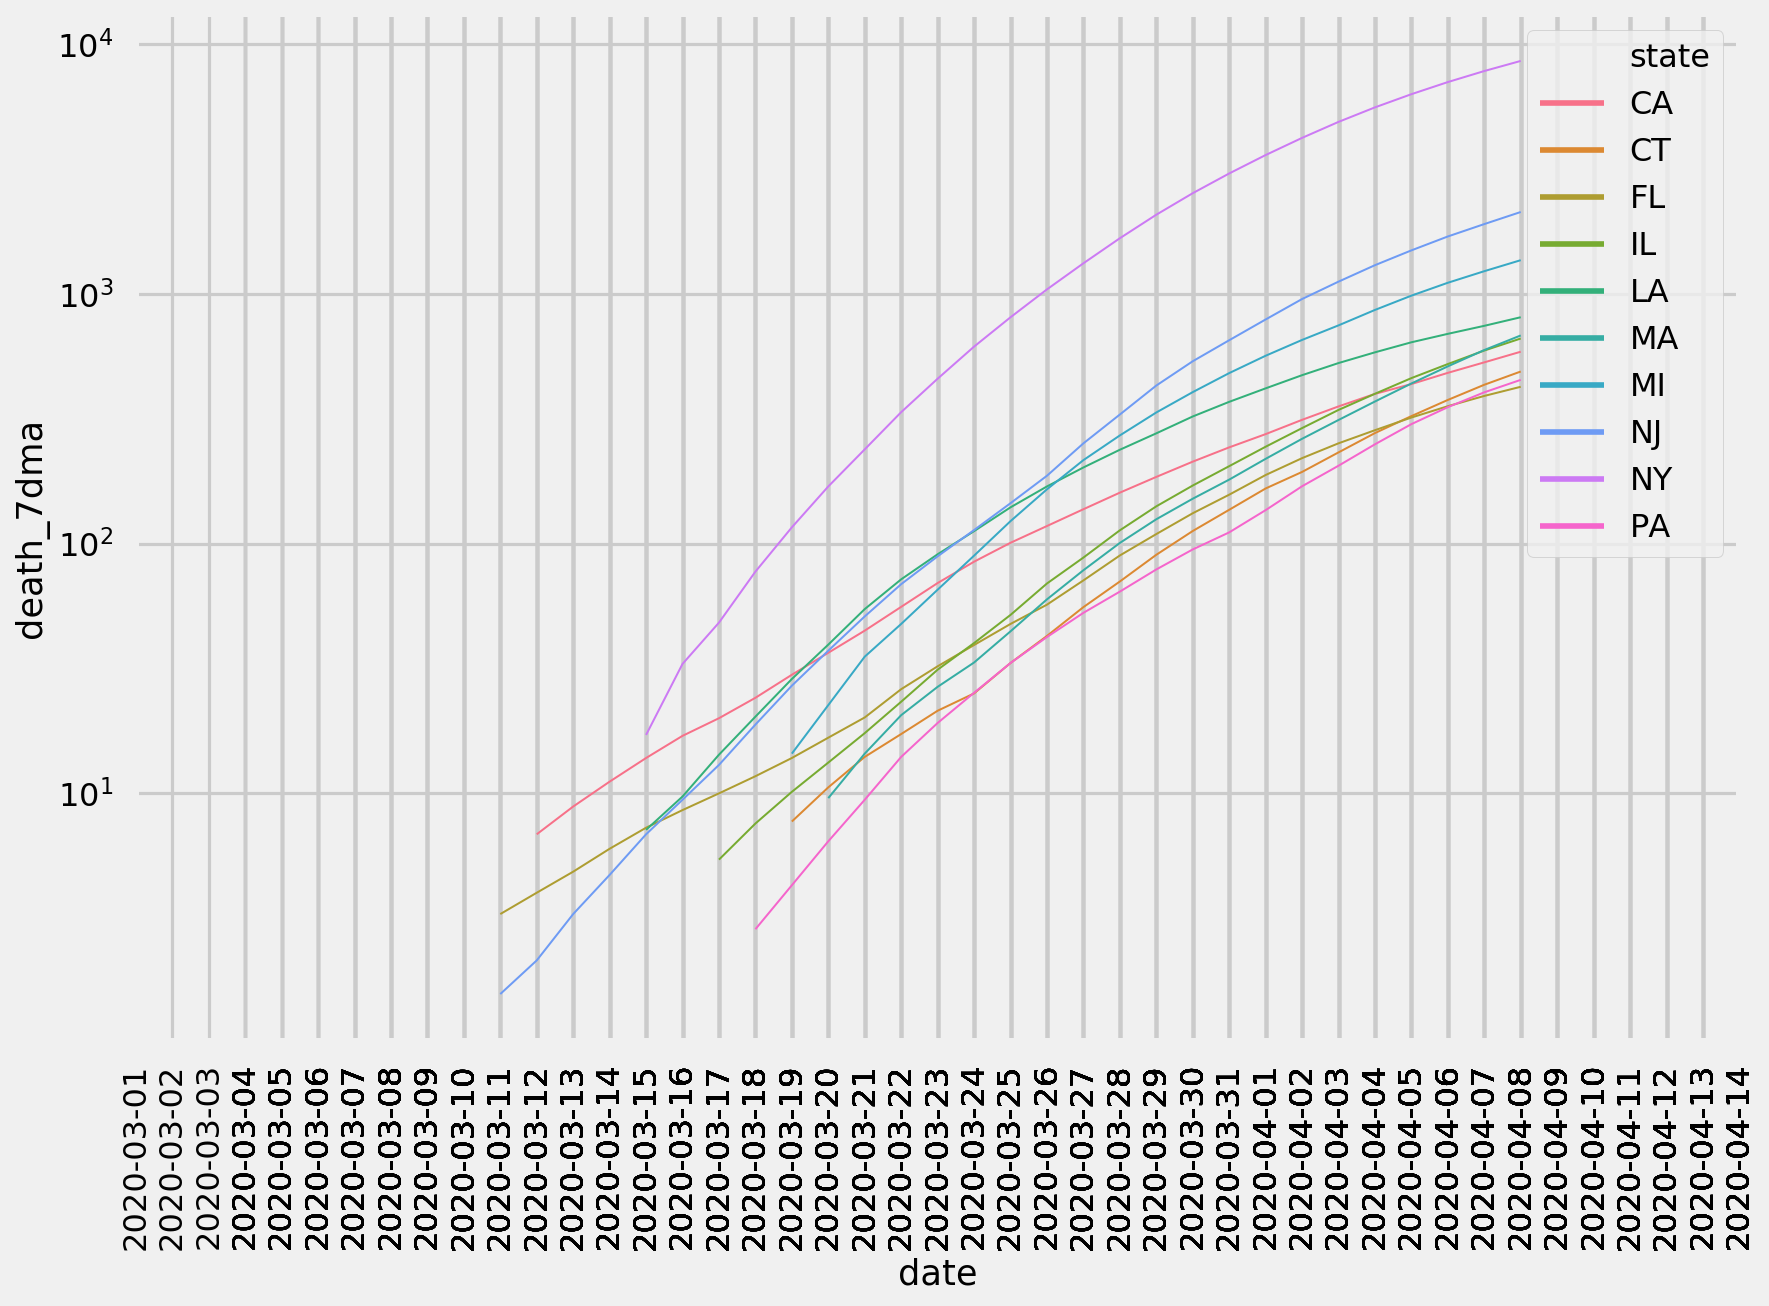

In [20]:
# TODO: index this by date first crossed 5 deaths
ax = sns.lineplot(x="date", 
                  y="death_7dma", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Positive Cases Per 100,000 People

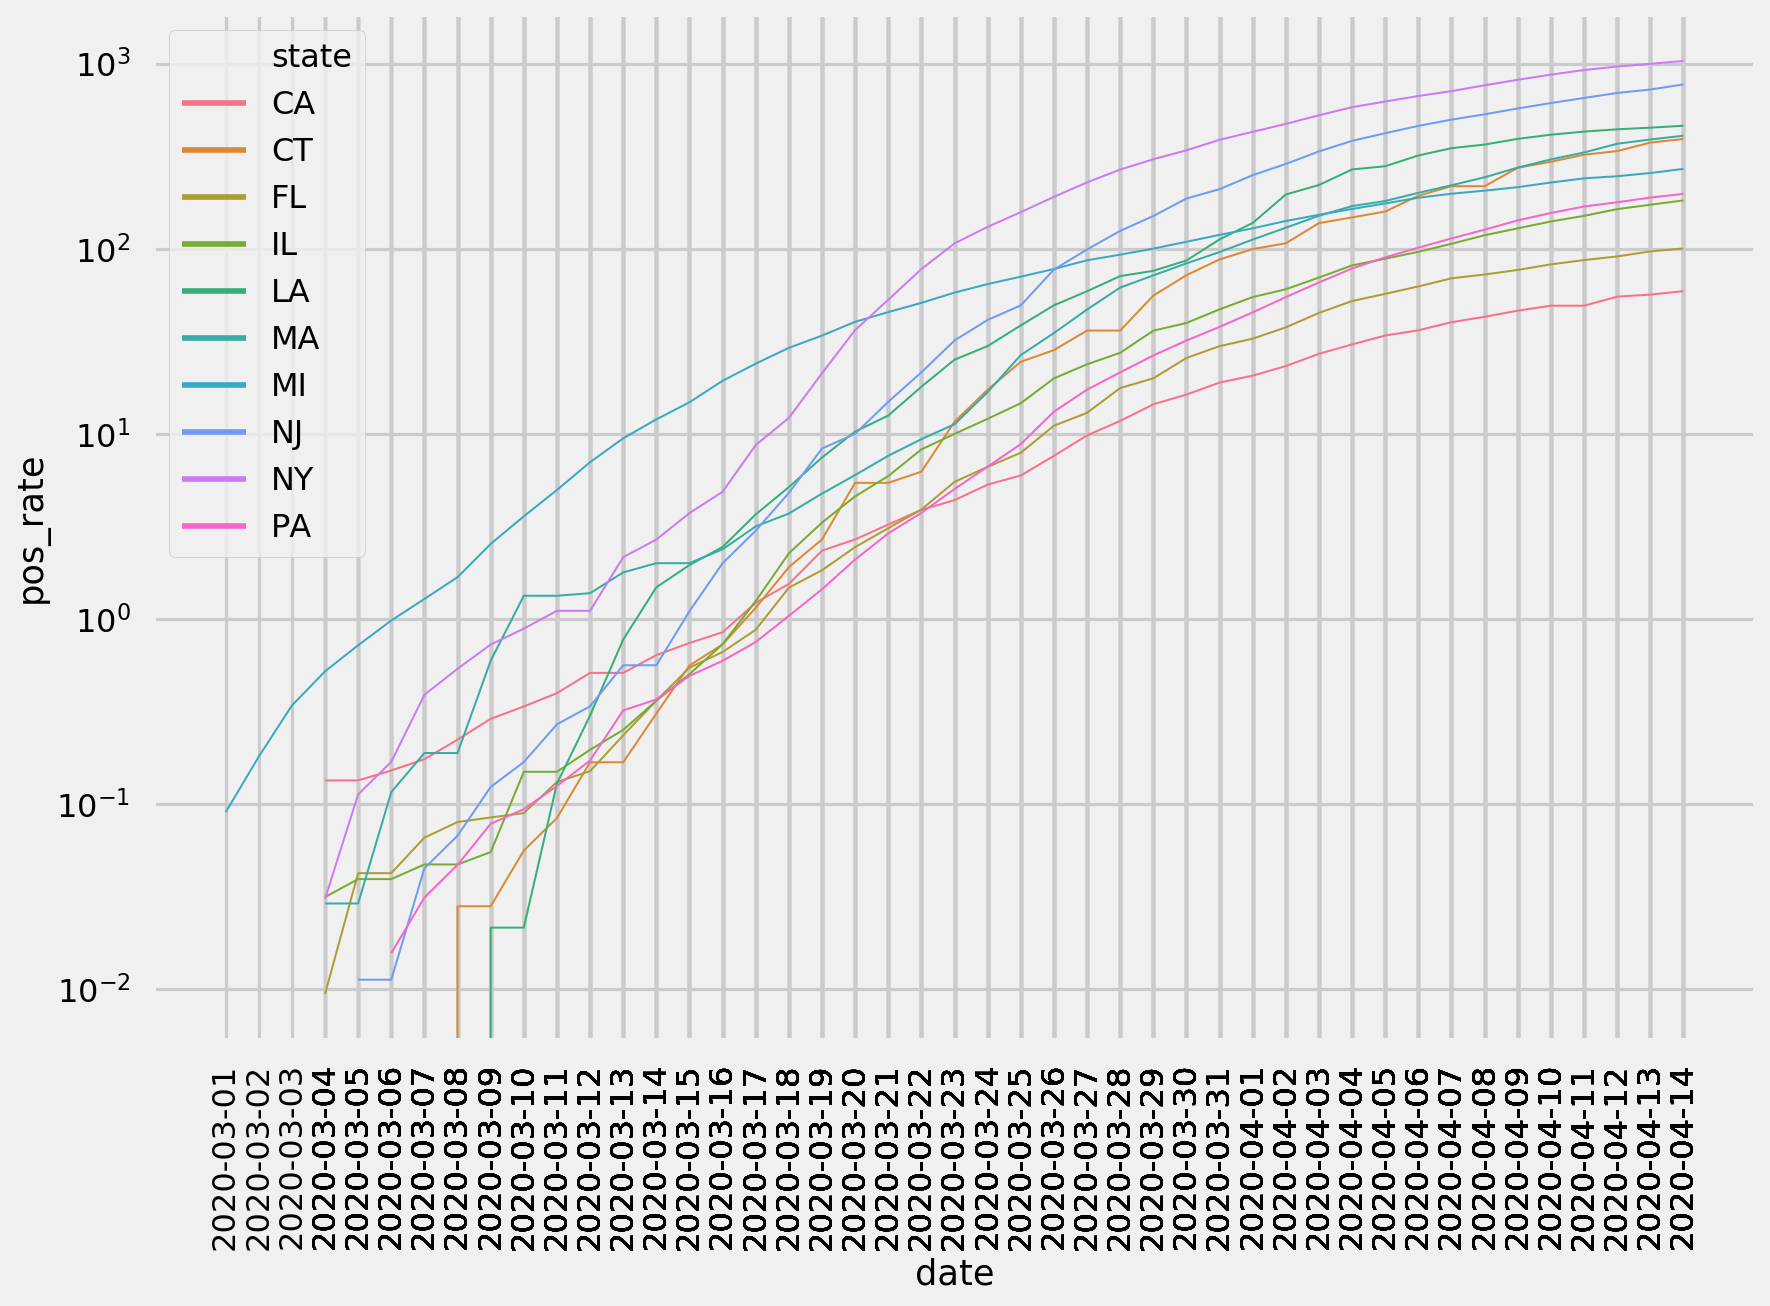

In [21]:
ax = sns.lineplot(x="date", y="pos_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Deaths Per 100,000 People

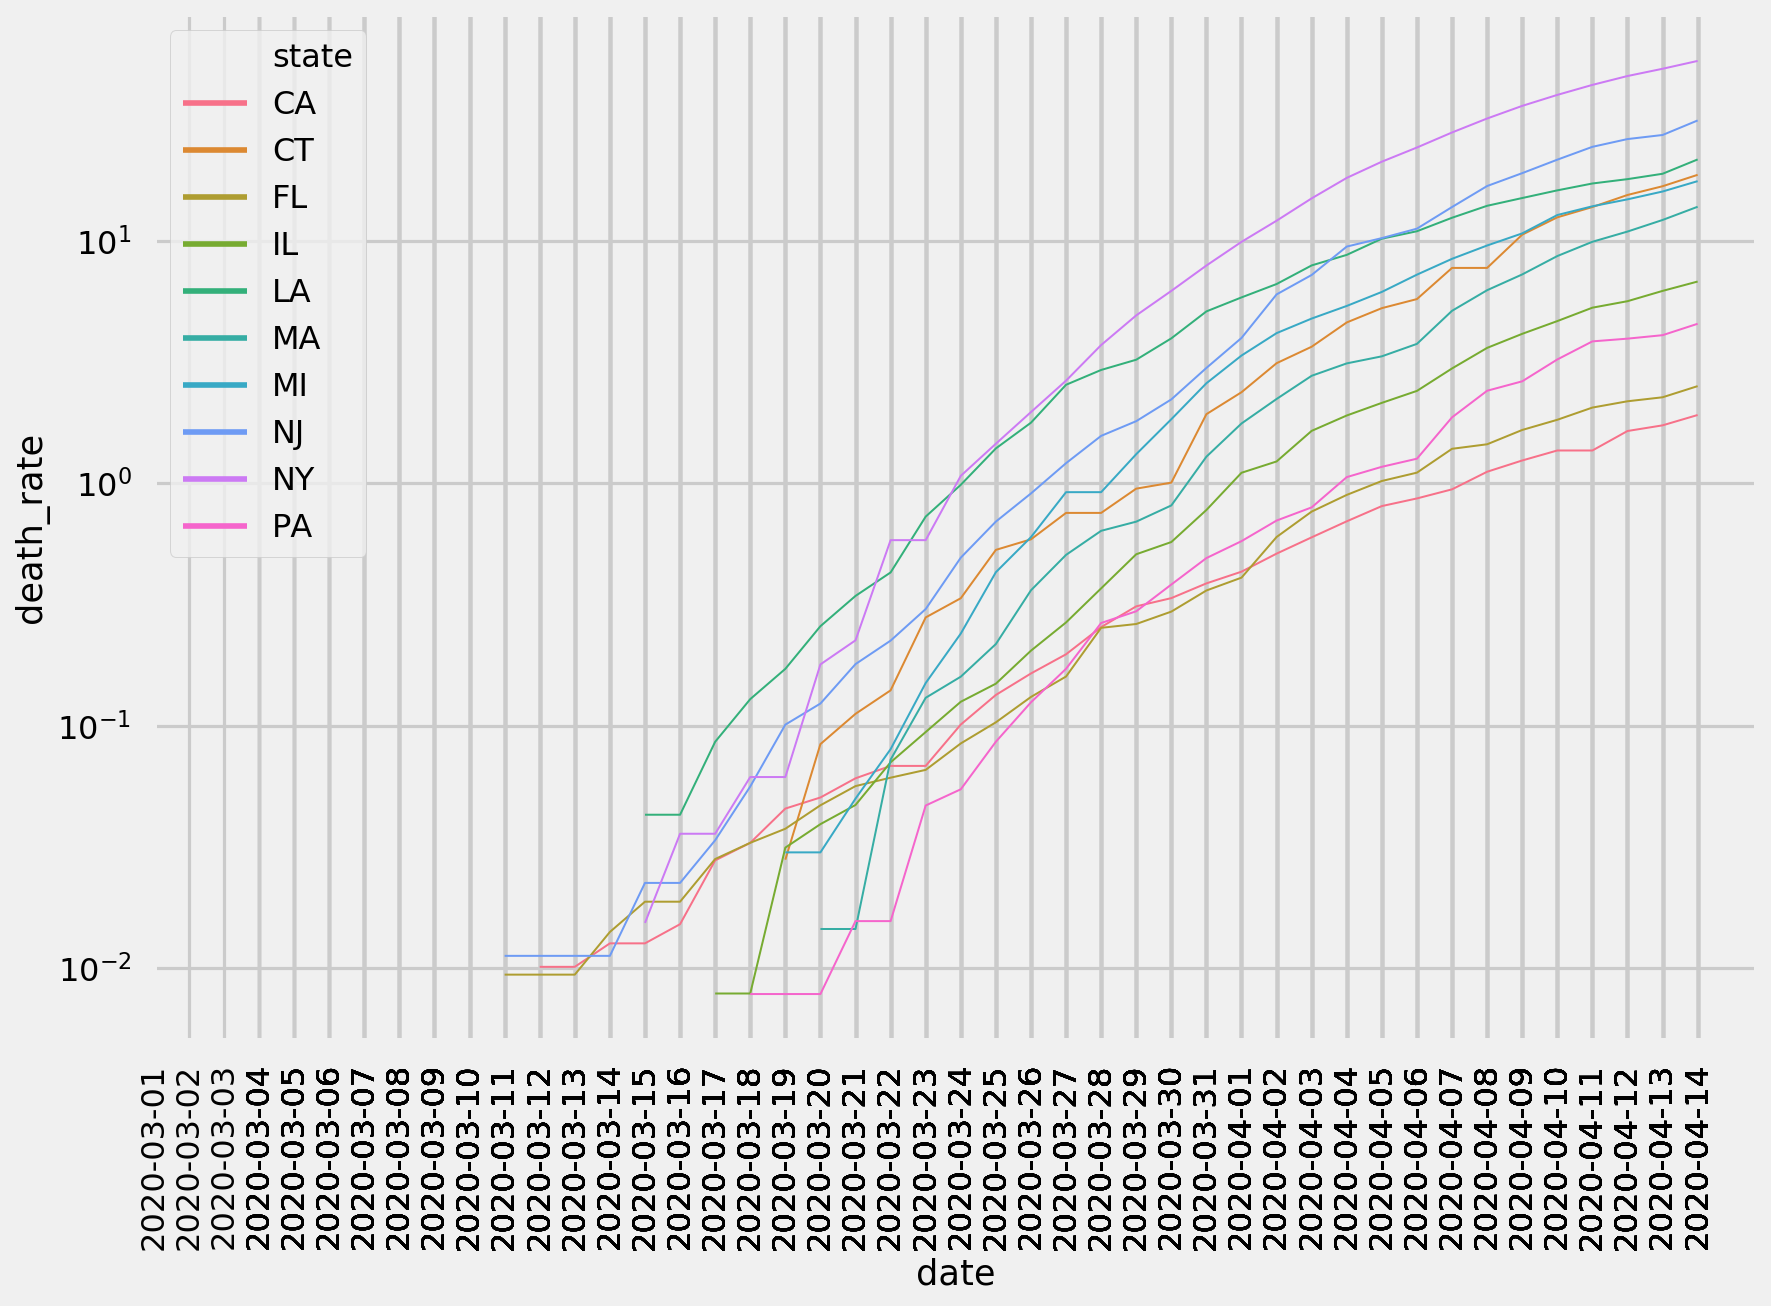

In [22]:
ax = sns.lineplot(x="date", y="death_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Tests Per 100,000 People

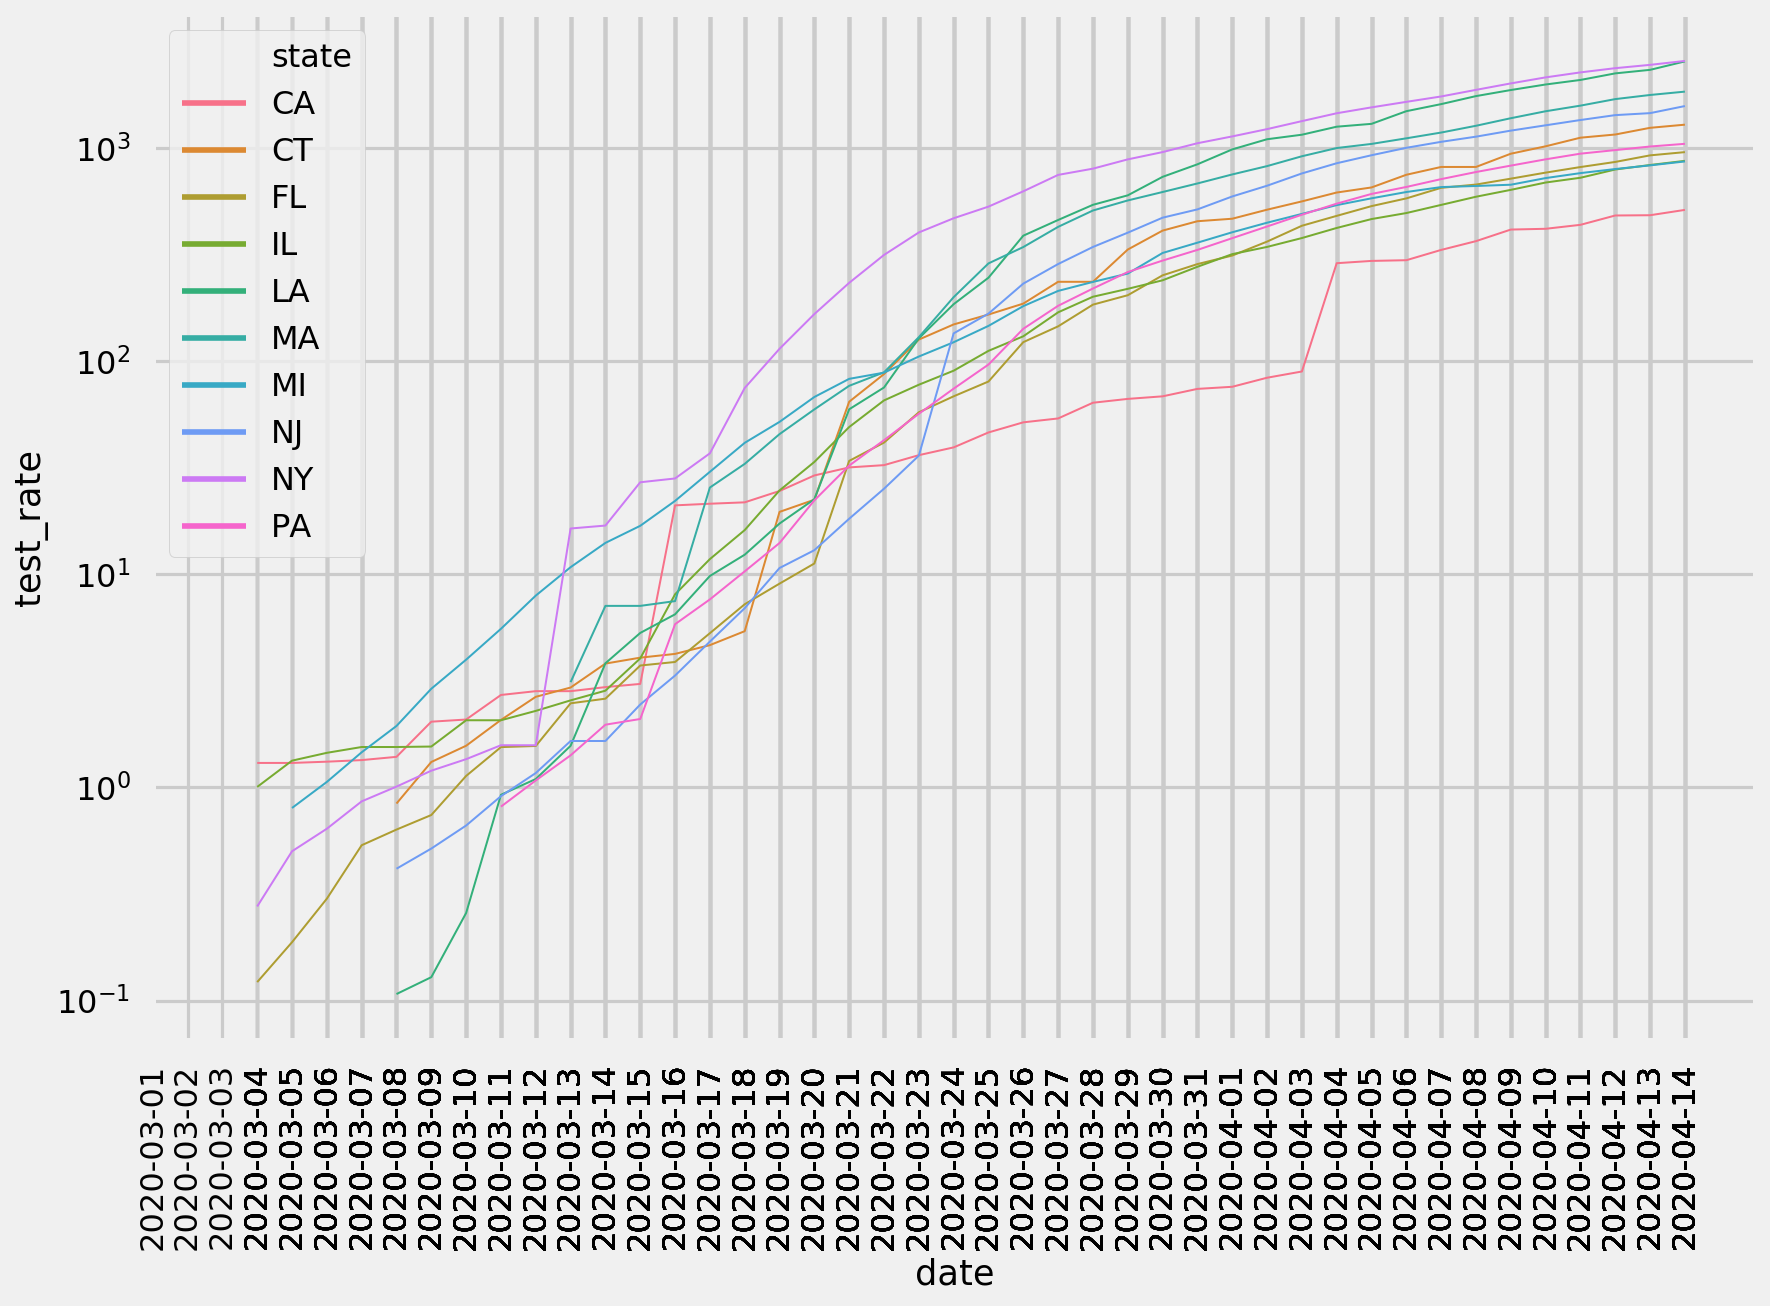

In [23]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

In [24]:
df_states.query('date == @latest_date').sort_values(by='test_rate', 
                                                    ascending=False)[['state', 'test_rate']]

,state,test_rate
1377,NY,2554.179008
728,LA,2541.256633
1611,RI,2165.863532
767,MA,1833.501421
1900,VT,1690.087323
283,DC,1639.677986
1255,NJ,1568.992380
1296,NM,1525.702625
1820,UT,1470.245373
1133,ND,1436.170283
